Original class distribution:
Label
BENIGN              2096484
DoS Hulk             172849
DDoS                 128016
PortScan              90819
DoS GoldenEye         10286
FTP-Patator            5933
DoS slowloris          5385
DoS Slowhttptest       5228
SSH-Patator            3219
Bot                    1953
Brute Force            1470
XSS                     652
Infiltration             36
Sql Injection            21
Heartbleed               11
Name: count, dtype: int64

After removing minority classes (min_samples=1000):
Label
BENIGN              2096484
DoS Hulk             172849
DDoS                 128016
PortScan              90819
DoS GoldenEye         10286
FTP-Patator            5933
DoS slowloris          5385
DoS Slowhttptest       5228
SSH-Patator            3219
Bot                    1953
Brute Force            1470
Name: count, dtype: int64
New class distribution:
 Label
5     172849
3     128016
0     100000
9      90819
4      10286
8       5933
7       5385
6   

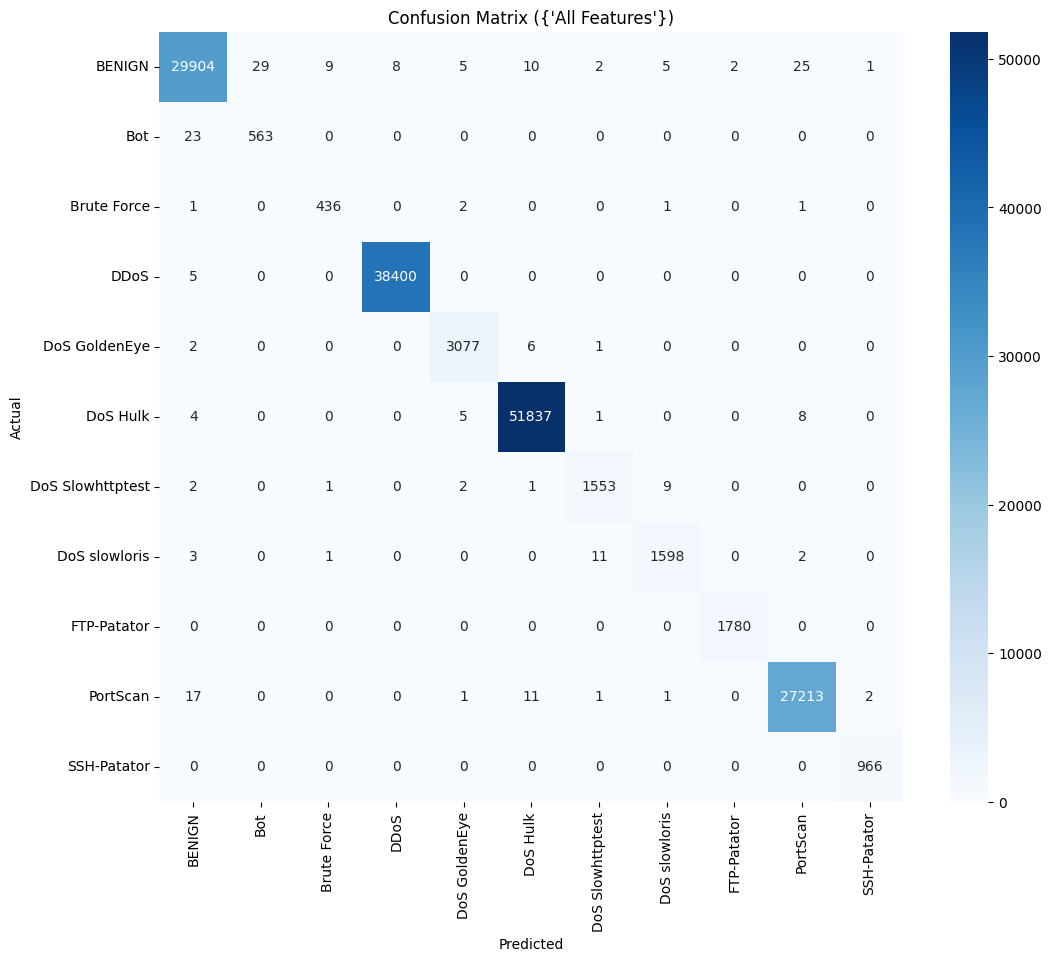

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import time
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append('../XAI_Evalation_For_IDS_datasets/Datasets_prepration')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

le, X, y, X_train, X_test, y_train, y_test, df  = data_preprocessing()
import time
start_total_time = time.time()
dt_model = DecisionTreeClassifier()

start_train_time = time.time()
dt_model.fit(X_train, y_train)
end_train_time = time.time()
start_pred_time = time.time()
y_pred_encoded_class = dt_model.predict(X_test)
end_pred_time = time.time()
end_total_time = time.time()

total_time = end_total_time - start_total_time
training_time = end_train_time - start_train_time
prediction_time = end_pred_time - start_pred_time

print("Number of samples before training:", len(X_train))
print(f"Total time: {total_time} seconds")
print(f"Training time: {training_time} seconds")
print(f"Prediction time: {prediction_time} seconds")

y_pred_class = le.inverse_transform(y_pred_encoded_class)
y_test_labels = le.inverse_transform(y_test)

metrics = evaluate_model(y_test_labels, y_pred_class, f" DT ({{'All Features'}})")

plot_confusion_matrix(y_test_labels, y_pred_class, le.classes_, f"Confusion Matrix ({{'All Features'}})")



# ------------- XAI methods --------------------------------

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Methods')
from SHAP import explain_with_shap
from LIME import explain_with_lime

# shap explanation 
shap_values, Shap_explainer = explain_with_shap(dt_model, X_train, X_test, model_type=None, num_samples=5000)
# lime_explianer, Lime_exp_Inst = explain_with_lime(dt_model, X_train, X_test, mode='classification', num_features=77)

# Lime explanation
lime_explianer, Lime_exp_Inst = explain_with_lime(
    model=dt_model,
    X_train=X_train,
    X_test=X_test,
    mode='classification',
    num_features=77,
    num_samples=5000,     
    kernel_width=None,      
    random_state=42,        
    discretize_continuous=True,
    return_instance_exp=True
)



In [7]:
print("SHAP values shape:", shap_values.shape)
print ("SHAP explainer:", Shap_explainer)
# display ("shap_values:", shap_values)

SHAP values shape: (100, 76, 11)
SHAP explainer: <shap.explainers._tree.TreeExplainer object at 0x72b519beb460>


In [8]:
print("LIME explainer:", lime_explianer)
print("LIME explanation instance:", Lime_exp_Inst)
# Accessing the explanation details instead of shape
print("LIME explanation instance details:", Lime_exp_Inst.as_list())


LIME explainer: <lime.lime_tabular.LimeTabularExplainer object at 0x72b5199d7790>
LIME explanation instance: <lime.explanation.Explanation object at 0x72b4967e34f0>
LIME explanation instance details: [('PSH Flag Count <= 0.00', -0.003515964696994597), ('Bwd IAT Max > 471874.00', 0.002891595554564789), ('Packet Length Variance > 3127699.58', 0.0028809753676877566), ('0.00 < Idle Min <= 83700000.00', 0.002697662368672728), ('Fwd IAT Std > 31900000.00', -0.0024804934712064847), ('Bwd Packets/s <= 0.06', -0.002415140447841855), ('Subflow Fwd Packets > 7.00', -0.0023957267201350466), ('Flow IAT Min <= 1.00', -0.0023753373691025137), ('Bwd Packet Length Std > 2182.47', -0.0023504913427170116), ('Idle Std > 0.00', 0.0019591985571140486)]


EVALUATING EXPLANATORY POWER

--- SHAP Explanatory Power ---

SHAP Results (Predicted Classes):
  Mean Raw Power: 0.8502
  Std Raw Power: 0.0909
  Min Raw Power: 0.7108
  Max Raw Power: 1.5315

  Mean Normalized Power: 1.0000
  Std Normalized Power: 0.0000
  R² Score: 1.0000
  ✓ Excellent: SHAP explanations highly correlate with model outputs
  ✓ Excellent: Explanations fully account for model outputs

--- LIME Explanatory Power ---
=== LIME EXPLAINER DIAGNOSTICS ===
Explainer type: <class 'lime.lime_tabular.LimeTabularExplainer'>
Explainer mode: classification
Single prediction probabilities shape: (1, 11)
Single prediction probabilities: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
LIME weights for single instance: 0.3562
Model output for single instance: 1.0000

LIME Results:
  Mean Raw Power: 1.1181
  Std Raw Power: 0.5775
  Min Raw Power: 0.0874
  Max Raw Power: 2.1692

  Mean Normalized Power: -0.0486
  Std Normalized Power: 9.5442
  R² Score: -4.7936
  ✗ Warning: LIME explanations may not

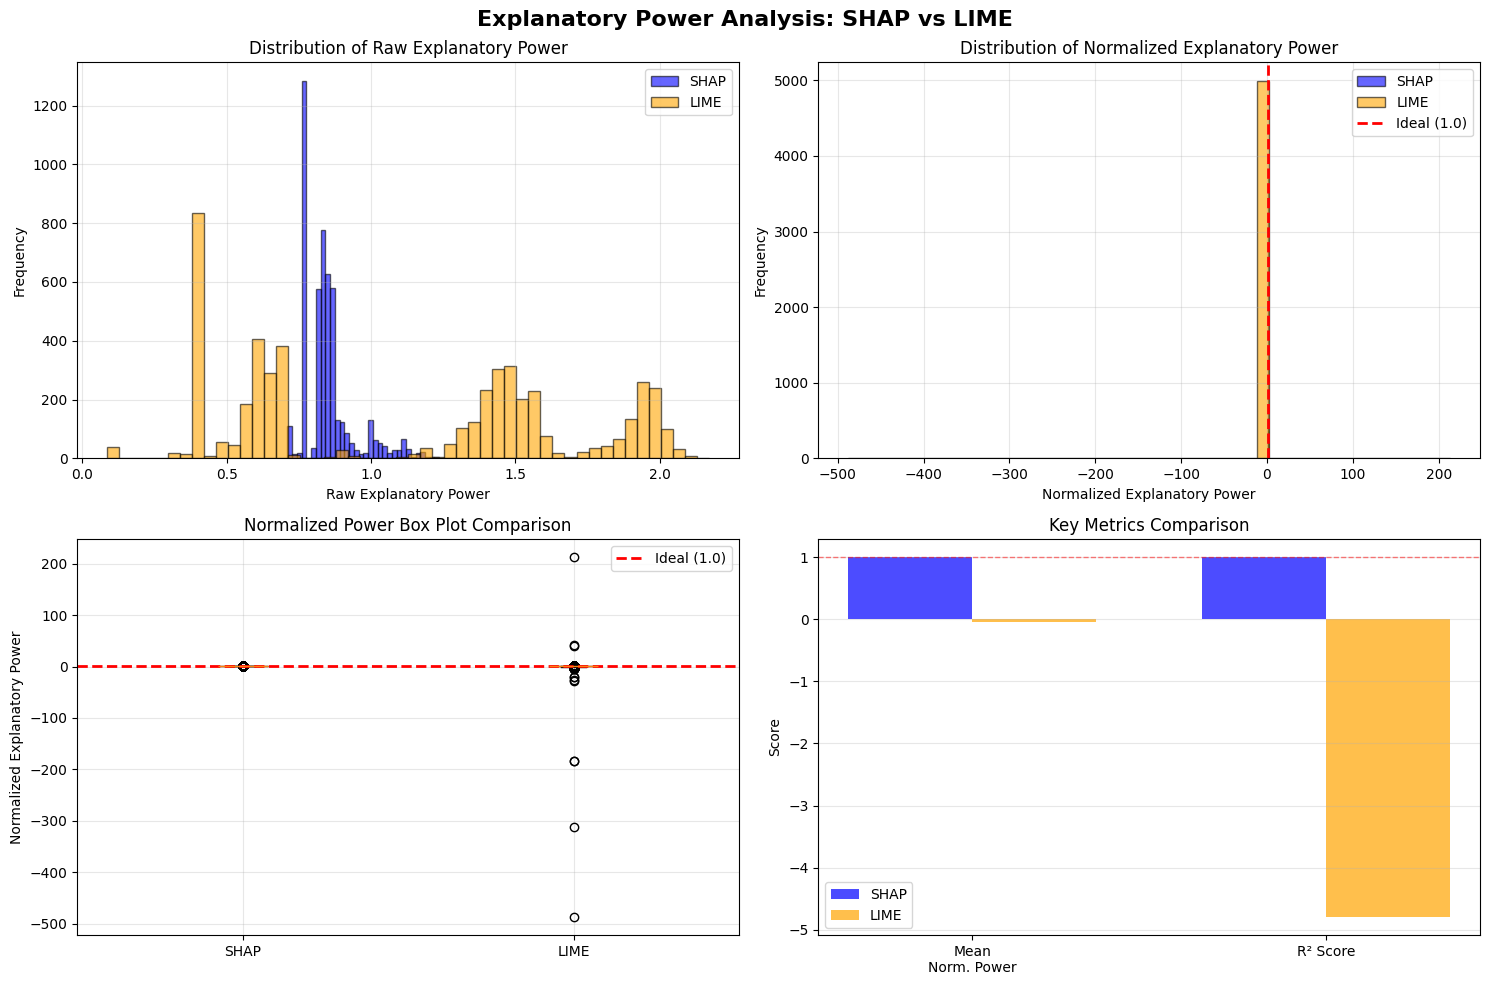

✓ Visualizations created successfully

EXPLANATORY POWER EVALUATION COMPLETE


In [ ]:
# ------------- Explanatory Power Evaluation --------------------------------


import sys
import importlib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Explanatory_Power
importlib.reload(Explanatory_Power)
from Explanatory_Power import XAIExplanatoryPowerEvaluator

# Initialize the evaluator
ep_evaluator = XAIExplanatoryPowerEvaluator(model=dt_model, n_jobs=-1, random_state=42)

print("=" * 80)
print("EVALUATING EXPLANATORY POWER")
print("=" * 80)

print("\n--- SHAP Explanatory Power ---")

# For multi-class classification, you can evaluate:
# 1. Overall (predicted class for each instance)
# 2. Specific class (e.g., class_idx=0 for first class)

# This Evaluate for a specific class like  class 1
"""
shap_results_class0 = ep_evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.head(500),
    method='shap',
    normalization='output',
    class_idx=1  # Evaluate for first class
)
print(f"\nSHAP Results for Class '{le.classes_[1]}':")
print(f"  Mean Normalized Power: {shap_results_class0['mean_normalized_power']:.4f}")
print(f"  R² Score: {shap_results_class0['r2_score']:.4f}")
"""


# This for Evaluate for predicted classes (multi-class)
shap_results_predicted = ep_evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.head(5000),  
    method='shap',
    normalization='output',  
    class_idx=None  # none means use predicted class for each instance
)



print("\nSHAP Results (Predicted Classes):")
print(f"  Mean Raw Power: {shap_results_predicted['mean_raw_power']:.4f}")
print(f"  Std Raw Power: {shap_results_predicted['std_raw_power']:.4f}")
print(f"  Min Raw Power: {shap_results_predicted['min_raw_power']:.4f}")
print(f"  Max Raw Power: {shap_results_predicted['max_raw_power']:.4f}")
print(f"\n  Mean Normalized Power: {shap_results_predicted['mean_normalized_power']:.4f}")
print(f"  Std Normalized Power: {shap_results_predicted['std_normalized_power']:.4f}")
print(f"  R² Score: {shap_results_predicted['r2_score']:.4f}")

#  R² Score
if shap_results_predicted['r2_score'] > 0.8:
    print("  Excellent: SHAP explanations highly correlate with model outputs")
elif shap_results_predicted['r2_score'] > 0.6:
    print("  Good: SHAP explanations reasonably correlate with model outputs")
else:
    print("  SHAP explanations may not fully capture model behavior")

#  Normalized Power
if 0.8 <= shap_results_predicted['mean_normalized_power'] <= 1.2:
    print("  Excellent: Explanations fully account for model outputs")
elif 0.6 <= shap_results_predicted['mean_normalized_power'] <= 1.4:
    print("  Good: Explanations mostly account for model outputs")
else:
    print("  Explanations may over/under-explain model outputs")



# --- LIME Explanatory Power Evaluation ---
print("\n" + "=" * 80)
print("--- LIME Explanatory Power ---")
# Add this diagnostic cell BEFORE evaluation

print("=== LIME EXPLAINER DIAGNOSTICS ===")
print(f"Explainer type: {type(lime_explianer)}")
print(f"Explainer mode: {lime_explianer.mode}")

# Test a single instance
test_instance = X_test.iloc[0].values
if dt_model.predict_proba is not None:
    pred_fn = lambda x: dt_model.predict_proba(pd.DataFrame(x, columns=X_test.columns))
    single_prob = pred_fn([test_instance])
    print(f"Single prediction probabilities shape: {single_prob.shape}")
    print(f"Single prediction probabilities: {single_prob[0]}")
    
# Get a single LIME explanation
exp = lime_explianer.explain_instance(
    test_instance.astype(np.double),
    pred_fn,
    num_features=10,
    labels=[dt_model.predict([test_instance])[0]]
)

weights = dict(exp.as_list(label=dt_model.predict([test_instance])[0]))
print(f"LIME weights for single instance: {sum(abs(v) for v in weights.values()):.4f}")
print(f"Model output for single instance: {single_prob[0][dt_model.predict([test_instance])[0]]:.4f}")


# LIME evaluation (handles classification automatically)
lime_results = ep_evaluator.evaluate(
    explainer=lime_explianer,
    X=X_test.head(5000),  # Use subset for faster computation
    method='lime',
    normalization='output',  # Options: 'output', 'max', 'none'
    class_idx=None  # LIME automatically uses predicted class
)

print("\nLIME Results:")
print(f"  Mean Raw Power: {lime_results['mean_raw_power']:.4f}")
print(f"  Std Raw Power: {lime_results['std_raw_power']:.4f}")
print(f"  Min Raw Power: {lime_results['min_raw_power']:.4f}")
print(f"  Max Raw Power: {lime_results['max_raw_power']:.4f}")
print(f"\n  Mean Normalized Power: {lime_results['mean_normalized_power']:.4f}")
print(f"  Std Normalized Power: {lime_results['std_normalized_power']:.4f}")
print(f"  R² Score: {lime_results['r2_score']:.4f}")

# Interpretation of R² Score
if lime_results['r2_score'] > 0.8:
    print("  Excellent: LIME explanations highly correlate with model outputs")
elif lime_results['r2_score'] > 0.6:
    print("   Good: LIME explanations reasonably correlate with model outputs")
else:
    print("   LIME explanations may not fully capture model behavior")

# Interpretation of Normalized Power
if 0.8 <= lime_results['mean_normalized_power'] <= 1.2:
    print("  Excellent: Explanations fully account for model outputs")
elif 0.6 <= lime_results['mean_normalized_power'] <= 1.4:
    print("  Good: Explanations mostly account for model outputs")
else:
    print("  Warning: Explanations may over/under-explain model outputs")

# --- Comparison ---
print("\n" + "=" * 80)
print("--- SHAP vs LIME Comparison ---")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Metric': ['Mean Raw Power', 'Mean Normalized Power', 'R² Score', 'Std Raw Power'],
    'SHAP': [
        shap_results_predicted['mean_raw_power'],
        shap_results_predicted['mean_normalized_power'],
        shap_results_predicted['r2_score'],
        shap_results_predicted['std_raw_power']
    ],
    'LIME': [
        lime_results['mean_raw_power'],
        lime_results['mean_normalized_power'],
        lime_results['r2_score'],
        lime_results['std_raw_power']
    ]
})

print(comparison_df.to_string(index=False))

# Determine which method has better explanatory power
print("\n--- Overall Assessment ---")
shap_score = (shap_results_predicted['r2_score'] + 
              (1 if 0.8 <= shap_results_predicted['mean_normalized_power'] <= 1.2 else 0.5))
lime_score = (lime_results['r2_score'] + 
              (1 if 0.8 <= lime_results['mean_normalized_power'] <= 1.2 else 0.5))

if shap_score > lime_score:
    print("SHAP has better explanatory power for this model")
elif lime_score > shap_score:
    print("LIME has better explanatory power for this model")
else:
    print("SHAP and LIME have similar explanatory power")

# --- For the resarch Analysis  ---
print("\n" + "=" * 80)
print("--- Distribution Analysis ---")
print("=" * 80)

# Analyze the distribution of powers
print("\nSHAP Power Distribution Percentiles:")
shap_percentiles = np.percentile(shap_results_predicted['raw_powers'], [25, 50, 75, 90, 95])
print(f"  25th percentile: {shap_percentiles[0]:.4f}")
print(f"  50th percentile (median): {shap_percentiles[1]:.4f}")
print(f"  75th percentile: {shap_percentiles[2]:.4f}")
print(f"  90th percentile: {shap_percentiles[3]:.4f}")
print(f"  95th percentile: {shap_percentiles[4]:.4f}")

print("\nLIME Power Distribution Percentiles:")
lime_percentiles = np.percentile(lime_results['raw_powers'], [25, 50, 75, 90, 95])
print(f"  25th percentile: {lime_percentiles[0]:.4f}")
print(f"  50th percentile (median): {lime_percentiles[1]:.4f}")
print(f"  75th percentile: {lime_percentiles[2]:.4f}")
print(f"  90th percentile: {lime_percentiles[3]:.4f}")
print(f"  95th percentile: {lime_percentiles[4]:.4f}")
\
print("\n" + "=" * 80)
print("--- Creating Visualizations ---")
print("=" * 80)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Explanatory Power Analysis: SHAP vs LIME', fontsize=16, fontweight='bold')

# 1. Raw Power Distribution
axes[0, 0].hist(shap_results_predicted['raw_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 0].hist(lime_results['raw_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 0].set_xlabel('Raw Explanatory Power')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Raw Explanatory Power')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Normalized Power Distribution
axes[0, 1].hist(shap_results_predicted['normalized_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 1].hist(lime_results['normalized_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Normalized Explanatory Power')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Normalized Explanatory Power')
axes[0, 1].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Box Plot Comparison
box_data = [shap_results_predicted['normalized_powers'], lime_results['normalized_powers']]
bp = axes[1, 0].boxplot(box_data, labels=['SHAP', 'LIME'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightyellow')
axes[1, 0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[1, 0].set_ylabel('Normalized Explanatory Power')
axes[1, 0].set_title('Normalized Power Box Plot Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Metrics Comparison Bar Chart
metrics_names = ['Mean\nNorm. Power', 'R² Score']
shap_metrics = [shap_results_predicted['mean_normalized_power'], shap_results_predicted['r2_score']]
lime_metrics = [lime_results['mean_normalized_power'], lime_results['r2_score']]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 1].bar(x - width/2, shap_metrics, width, label='SHAP', color='blue', alpha=0.7)
axes[1, 1].bar(x + width/2, lime_metrics, width, label='LIME', color='orange', alpha=0.7)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Key Metrics Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add reference line for normalized power
axes[1, 1].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print(" Visualizations created successfully")
print("\n" + "=" * 80)
print("EXPLANATORY POWER EVALUATION COMPLETE")
print("=" * 80)

In [ ]:
# some features are considered "actionable" in a network security context

actionable_features = [col for col in X_test.columns if any(x in col.lower() for x in 
                      ['rate', 'flag', 'port', 'protocol', 'count', 'packet', 'byte'])]

print(f"Number of total features: {len(X_test.columns)}")
print(f"Number of actionable features: {len(actionable_features)}")
print("Sample of actionable features:", actionable_features[:76])

Number of total features: 76
Number of actionable features: 45
Sample of actionable features: ['Destination Port', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Pac

==== ACTIONABILITY SUMMARY ====
LIME Actionability Mean Score: 0.5573836414456107
SHAP Actionability Mean Score: 0.980998518801351
==== Actionability Summary Table ====


,Method,Mean,Std,Median,N
0,LIME,0.557384,0.110840,0.558768,1000
1,SHAP,0.980999,0.021760,0.983687,1000



==== Comparison (LIME vs SHAP) ====


,Paired t-stat,Paired p-value,Cohen's d (paired),Pearson r,Pearson p-value,Significant (alpha=0.05)
0,-117.034,0.00e+00,-3.701,-0.071,2.47e-02,Yes


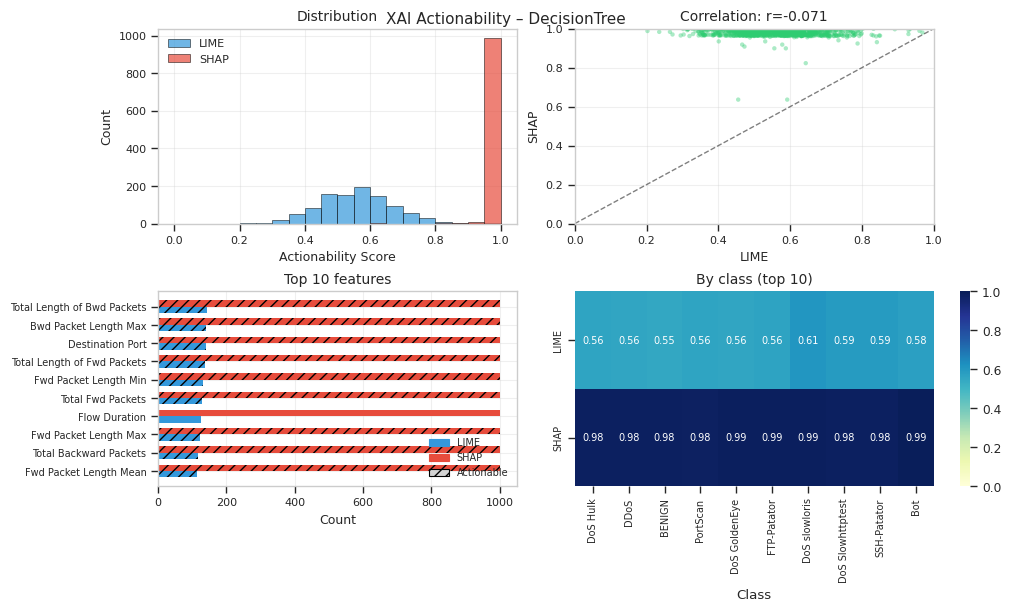

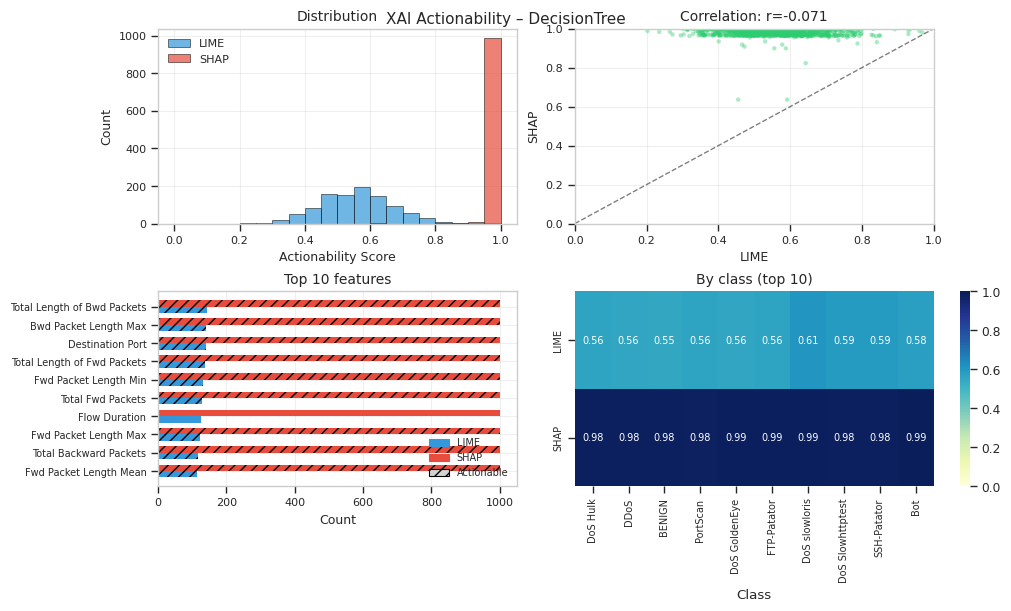

In [ ]:
import sys
import importlib
import pandas as pd
from regex import F

from sympy import false
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Actionability
importlib.reload(Actionability)
import warnings
warnings.filterwarnings('ignore')


# Initialize evaluator
actionability_evaluator = Actionability.XAIActionabilityEvaluator(dt_model)


# Helper function
def get_detailed_actionability_results(evaluator, explainer, X, method, actionable_features, 
                                     top_k=15, sample_size=None, random_state=42):
    results = evaluator.evaluate_actionability(
        explainer=explainer,
        X=X,
        method=method,
        actionable_features=actionable_features,
        top_k=top_k,
        verbose=False,
        sample_size=sample_size,
        random_state=random_state,
        return_details=True  
    )
    return results

# Evaluate actionability for LIME and SHAP
lime_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=lime_explianer,
    X=X_test,
    method='lime',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=1000  
)
# ---------------------------------------------
shap_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=Shap_explainer,
    X=X_test,
    method='shap',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=1000 
)


y_pred_encoded = dt_model.predict(X_test)
class_names = le.classes_  

# -------------------------------------------------------------------------------




print("==== ACTIONABILITY SUMMARY ====")
print("LIME Actionability Mean Score:", lime_results['mean_score'])
print("SHAP Actionability Mean Score:", shap_results['mean_score'])


# Align perinstance scores, this (paired comparisons)
lime_scores = np.asarray(lime_results['instance_scores'], dtype=float)
shap_scores = np.asarray(shap_results['instance_scores'], dtype=float)
n = min(len(lime_scores), len(shap_scores))
lime_scores = lime_scores[:n]
shap_scores = shap_scores[:n]

# Summary 
def summarize(arr):
    return {
        "mean": float(np.mean(arr)),
        "std": float(np.std(arr, ddof=1)),
        "median": float(np.median(arr)),
        "n": int(len(arr))
    }

lime_summary = summarize(lime_scores)
shap_summary = summarize(shap_scores)

# Paired t-test (LIME and SHAP ) perinstance 
t_stat, p_ttest = stats.ttest_rel(lime_scores, shap_scores, nan_policy='omit')
diff = lime_scores - shap_scores
cohens_d = float(np.mean(diff) / (np.std(diff, ddof=1) + 1e-12))

# Pearson correlation between perinstance scores
r_corr, p_corr = stats.pearsonr(lime_scores, shap_scores)

# summary table
summary_table = pd.DataFrame([
    {"Method": "LIME", "Mean": lime_summary["mean"], "Std": lime_summary["std"], "Median": lime_summary["median"], "N": lime_summary["n"]},
    {"Method": "SHAP", "Mean": shap_summary["mean"], "Std": shap_summary["std"], "Median": shap_summary["median"], "N": shap_summary["n"]},
])

comparison_table = pd.DataFrame([{
    "Paired t-stat": float(t_stat),
    "Paired p-value": float(p_ttest),
    "Cohen's d (paired)": cohens_d,
    "Pearson r": float(r_corr),
    "Pearson p-value": float(p_corr),
    "Significant (alpha=0.05)": "Yes" if p_ttest < 0.05 else "No"
}])

print("==== Actionability Summary Table ====")
display(summary_table.style.format({"Mean": "{:.6f}", "Std": "{:.6f}", "Median": "{:.6f}"}))
print("\n==== Comparison (LIME vs SHAP) ====")
display(comparison_table.style.format({"Paired p-value": "{:.2e}", "Pearson p-value": "{:.2e}", "Paired t-stat": "{:.3f}", "Pearson r": "{:.3f}", "Cohen's d (paired)": "{:.3f}"}))



# visualize results
Actionability.XAIActionabilityEvaluator.visualize_actionability_results(
    lime_results, shap_results, actionable_features, model_name="DecisionTree",     y_pred=y_pred_encoded,
    class_names=class_names
)



Running Complete Evaluation Pipeline for DT CICIDS2017 Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 20; using n=20.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for DT CICIDS2017 Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 50; using n=50.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for DT CICIDS2017 Datase

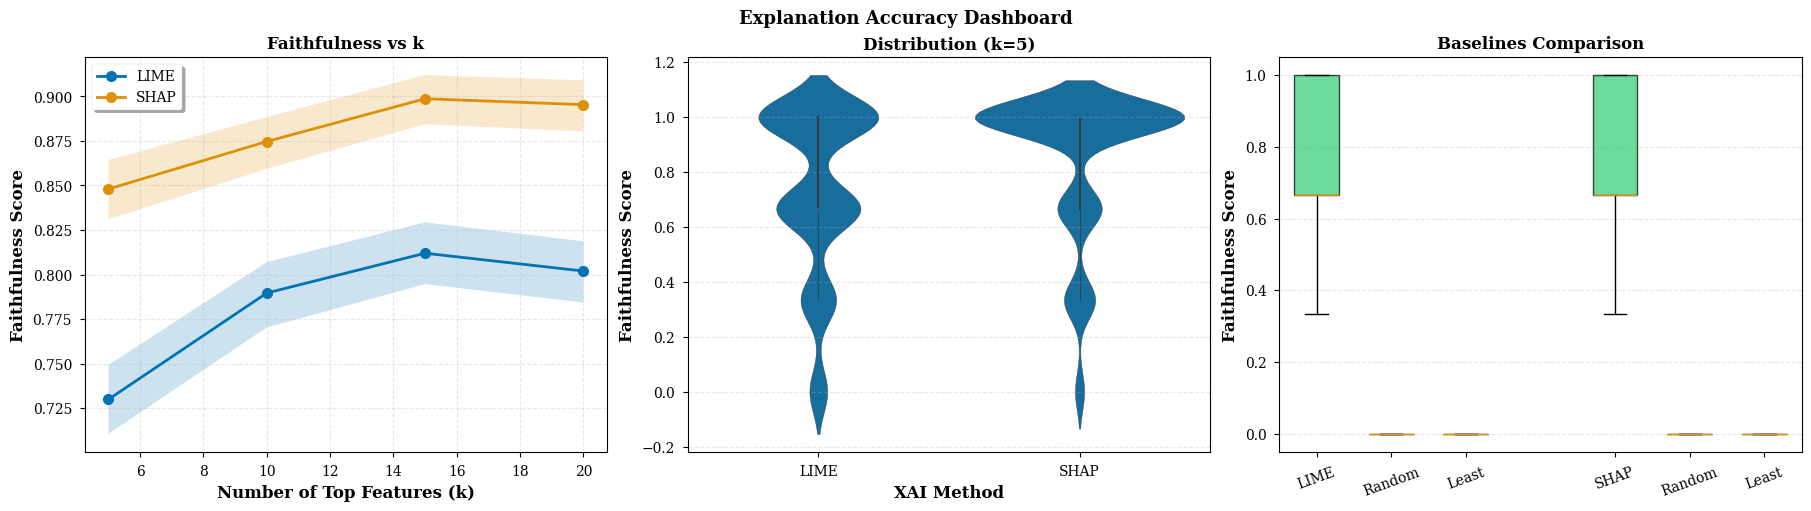


--- Generating Summary Report ---
  Saved: Exp_Acc_CIC_DT_results/summary_report.txt

DT COMPLETE! All results saved to ./results/

Generated files:
  - tables/main_results.csv & .tex
  - tables/validation.csv & .tex
  - figures/faithfulness_by_k.pdf & .png
  - figures/distribution_comparison.pdf & .png
  - figures/baseline_comparison.pdf & .png
  - summary_report.txt
SHAP Faithfulness : 0.738
LIME Faithfulness : 0.671


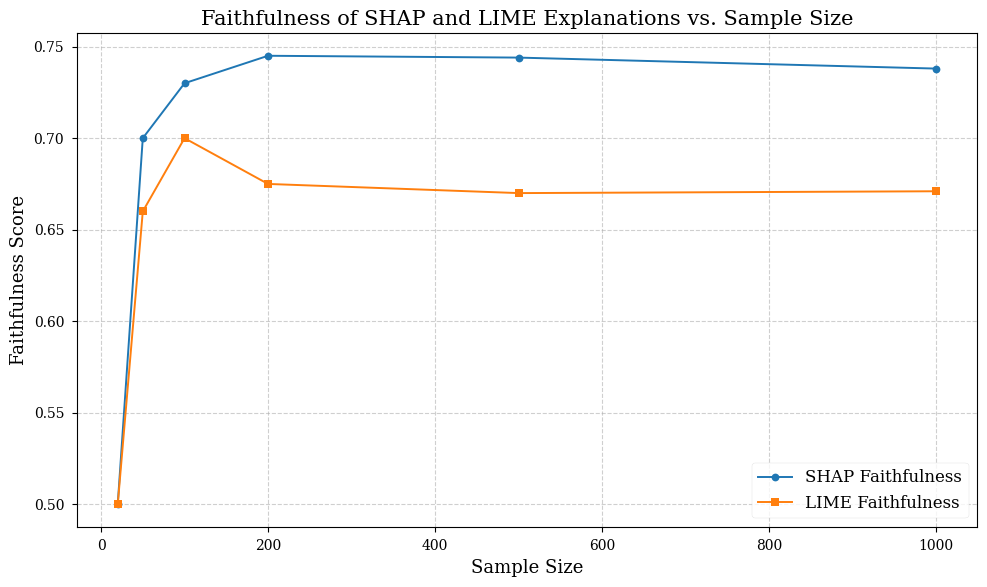

   instance_idx  faithfulness_score  \
0             0                 0.0   
1             1                 0.0   
2             2                 1.0   
3             3                 0.0   
4             4                 1.0   

                                    top_features_idx  \
0  [66, 65, 8, 53, 44, 46, 32, 4, 20, 38, 37, 0, ...   
1  [66, 65, 8, 53, 44, 46, 32, 4, 20, 38, 37, 0, ...   
2  [65, 53, 66, 27, 63, 44, 5, 9, 24, 6, 42, 52, ...   
3  [65, 66, 8, 32, 38, 20, 67, 46, 44, 53, 4, 18,...   
4  [66, 44, 65, 32, 75, 17, 67, 20, 22, 15, 0, 53...   

                                  top_features_names  \
0  [act_data_pkt_fwd, Init_Win_bytes_backward, Fw...   
1  [act_data_pkt_fwd, Init_Win_bytes_backward, Fw...   
2  [Init_Win_bytes_backward, Fwd Header Length.1,...   
3  [Init_Win_bytes_backward, act_data_pkt_fwd, Fw...   
4  [act_data_pkt_fwd, PSH Flag Count, Init_Win_by...   

                                   importance_values  original_pred  
0  [0.351569051500859

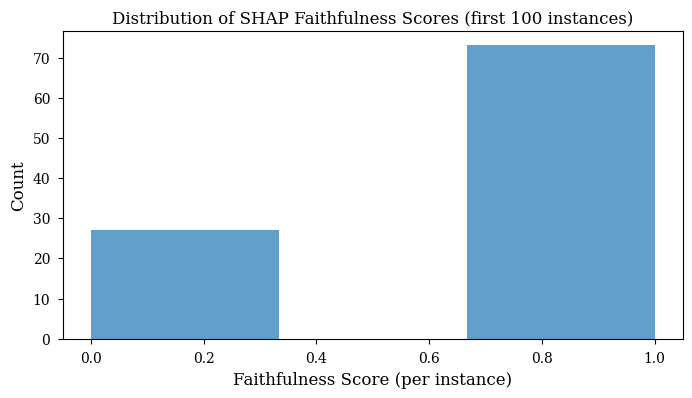

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import importlib

sys.path.append('../XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Accuracy_of_Explanation
importlib.reload(Accuracy_of_Explanation)

from Accuracy_of_Explanation import XAIExplanationAccuracyEvaluator , PaperResultsGenerator

# Initialize evaluator
evaluator = XAIExplanationAccuracyEvaluator(
    model=dt_model,
    perturbation_strategy='median',  # or 'zero', 'median', 'noise', 'random'
    task='classification'
)


# multiple sample sizes or top_k values
sample_sizes = [20, 50, 100, 200, 500, 1000]
faithfulness_shap_scores = []
faithfulness_lime_scores = []

generator = PaperResultsGenerator(output_dir="./Exp_Acc_CIC_DT_results")
for size in sample_sizes:
    X_sample = X_test.iloc[:size]
    faithfulness_shap = evaluator.evaluate(
        explainer=Shap_explainer,
        X=X_sample,
        method='shap',
        top_k=15,
        return_details=False
    )
    faithfulness_lime = evaluator.evaluate(
        explainer=lime_explianer,
        X=X_sample,
        method='lime',
        top_k=15,
        return_details=False
    )
    faithfulness_shap_scores.append(faithfulness_shap)
    faithfulness_lime_scores.append(faithfulness_lime)

    results = generator.run_complete_evaluation(
        model=dt_model,
        X=X_sample,
        explainer_lime=lime_explianer,
        explainer_shap=Shap_explainer,
        dataset_name="DT CICIDS2017 Dataset",  
        top_k_values=[5 , 10 , 15 , 20 ],
        n_samples_validation=1000
    )

# generate all outputs
generator.generate_tables(results)
generator.generate_figures(results)
generator.generate_summary_report(results)

print("\n" + "="*70)
print("DT COMPLETE! All results saved to ./results/")
print("="*70)
print("\nGenerated files:")
print("  - tables/main_results.csv & .tex")
print("  - tables/validation.csv & .tex")
print("  - figures/faithfulness_by_k.pdf & .png")
print("  - figures/distribution_comparison.pdf & .png")
print("  - figures/baseline_comparison.pdf & .png")
print("  - summary_report.txt")

print(f"SHAP Faithfulness :", faithfulness_shap)
print(f"LIME Faithfulness :", faithfulness_lime)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, faithfulness_shap_scores, marker='o', label='SHAP Faithfulness', color='tab:blue')
plt.plot(sample_sizes, faithfulness_lime_scores, marker='s', label='LIME Faithfulness', color='tab:orange')
plt.xlabel('Sample Size', fontsize=13)
plt.ylabel('Faithfulness Score', fontsize=13)
plt.title('Faithfulness of SHAP and LIME Explanations vs. Sample Size', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# Per-instance details
details = evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.iloc[:100],
    method='shap',
    top_k=15,
    return_details=True
)
import pandas as pd
details_df = pd.DataFrame(details['details'])
print(details_df.head())
plt.figure(figsize=(8, 4))
plt.hist(details_df['faithfulness_score'], bins=3, color='tab:blue', alpha=0.7)
plt.xlabel('Faithfulness Score (per instance)')
plt.ylabel('Count')
plt.title('Distribution of SHAP Faithfulness Scores (first 100 instances)')
plt.show()


